In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import re

In [2]:
def read_csv(path: str):
    """
    Funcao responsavel por realizar a leitura de um dataset em formato csv

    Parameters:
    path: Arquivo csv contendo os dados

    Returns: 
    df: DataFrame contendo os dados já lidos 
    """
    df = pd.read_csv(path, low_memory=True, dtype=str)
    if "votos_cantidad" in df.columns:
        df["votos_cantidad"] = df["votos_cantidad"].astype("int32")

    return df

In [3]:
coalizoes = [
    "JUNTOS POR EL CAMBIO",
    "UNION POR LA PATRIA", 
    "LA LIBERTAD AVANZA",
    "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "HACEMOS POR NUESTRO PAIS",
    "FRENTE DE TODOS",
    "CONSENSO FEDERAL",
    "TERCERA VIA",
    "CAMBIA MENDOZA",
    "CAMBIEMOS",
    "UNIDAD CIUDADANA",
    "JUSTICIALISMO",
    "1PAIS",
    "PARTIDO SOCIALISTA",
    "FRENTE PARA LA VICTORIA",
    "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "PROGRESISTAS",
    "COMPROMISSO FEDERAL",
    "FRENTE DE RENOVACION",
    "PERONISMO FEDERAL",
    "UNION PRO",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES",
    "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE RENOVADOR",
    "PROPUESTA REPUBLICANA",
    "PARTIDO FE",
    "NUEVA IZQUIERDA",
    "UNIDAD CIUDADANA",
    "FRENTE JUSTICIALISTA"
]


# Dicionário de normalizações específicas
normalizacoes = {
    "JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "HACEMOS": "HACEMOS POR NUESTRO PAIS",
    "FRENTE DE IZQUIERDA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "FRENTE DE TODOS": "FRENTE DE TODOS",
    "ARI": "COALICION CIVICA - (ARI)",
    "PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "FE": "PARTIDO FE",
    "FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "CAMBIEMOS": "CAMBIEMOS",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES": "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES",
    "FRENTE PROGRESISTA CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "ALIANZA PROGRESISTA": "PROGRESISTAS",
    "NUEVA ALTERNATIVA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "1PAIS": "1PAIS",
    "UNIDAD CIUDADANA": "UNIDAD CIUDADANA",
    "ENCUENTRO POR CORRIENTES": "ENCUENTRO POR CORRIENTES",
    "FRENTE JUSTICIALISTA": "FRENTE JUSTICIALISTA",
    "JUNTOS": "JUNTOS POR EL CAMBIO"
}

def normalize_name(name: str) -> str:
    """Normaliza o nome de partidos/coalizões com prioridade para correspondências exatas."""
    if pd.isna(name):
        return name
    
    # Limpeza do nome
    processed_name = unicodedata.normalize('NFD', name)
    processed_name = ''.join(c for c in processed_name if unicodedata.category(c) != 'Mn')
    processed_name = processed_name.upper().strip()

    if processed_name in normalizacoes:
        return normalizacoes[processed_name]

    # Normalização específica
    for chave, valor in normalizacoes.items():
        if chave in processed_name:
            return valor

    # Limpeza final de espaços
    final_name = re.sub(r'\s+', ' ', processed_name)
    return final_name.strip()     

In [4]:
def plot_votos(df: pd.DataFrame, cargo:str, ano:str):
    """
    Plota um gráfico de barras com os votos agrupados por partido para um determinado cargo.

    Parameters:
    df: DataFrame contendo os dados
    cargo: Cargo a ser utilizado como filtro (string)
    """

    # Filtrando para apenas Presidente
    df_presidente = df[df["cargo_nombre"] == cargo]

    # Agrupando votos para Presidente por Partido
    votos_por_partido = (
        df_presidente.groupby("agrupacion_nombre")["votos_cantidad"]
        .sum()
        .sort_values(ascending=False)
        .head(10))

    # Exibição do gráfico
    plt.figure(figsize=(10,6))
    votos_por_partido.plot(kind="bar", color="#233C49")
    plt.title(f"Votos para {cargo} por Partido - {ano}")
    plt.ylabel("Quantidade de votos")
    plt.xlabel("Partido", fontsize=8)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [5]:
#Leitura do CSV de 2023 contendo os resultados eleitorais provisorios
df_2023 = read_csv("data/ResultadoElectorales_2023_Generales.csv")
df_2023["agrupacion_nombre"] = df_2023["agrupacion_nombre"].apply(normalize_name)

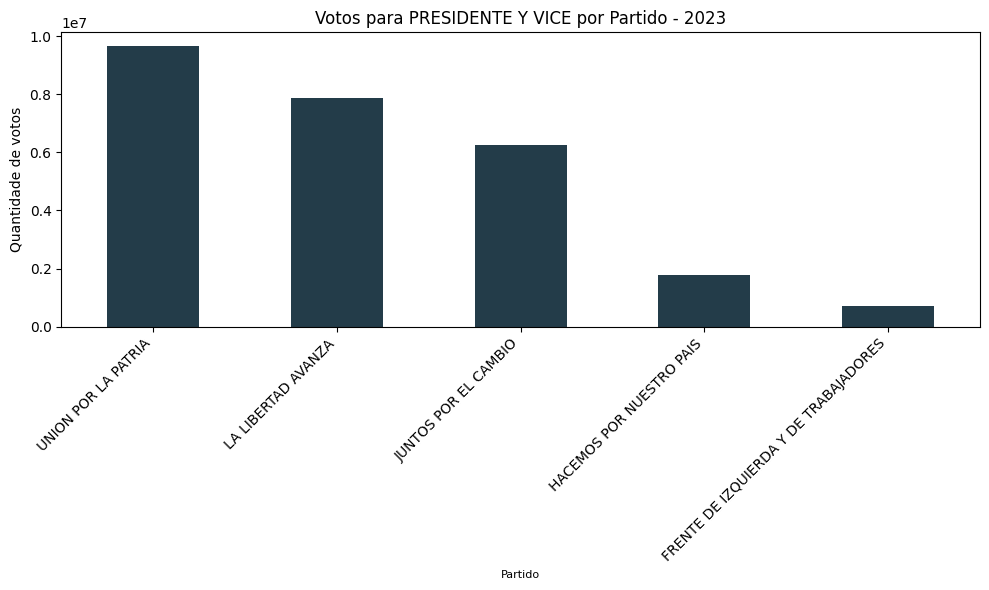

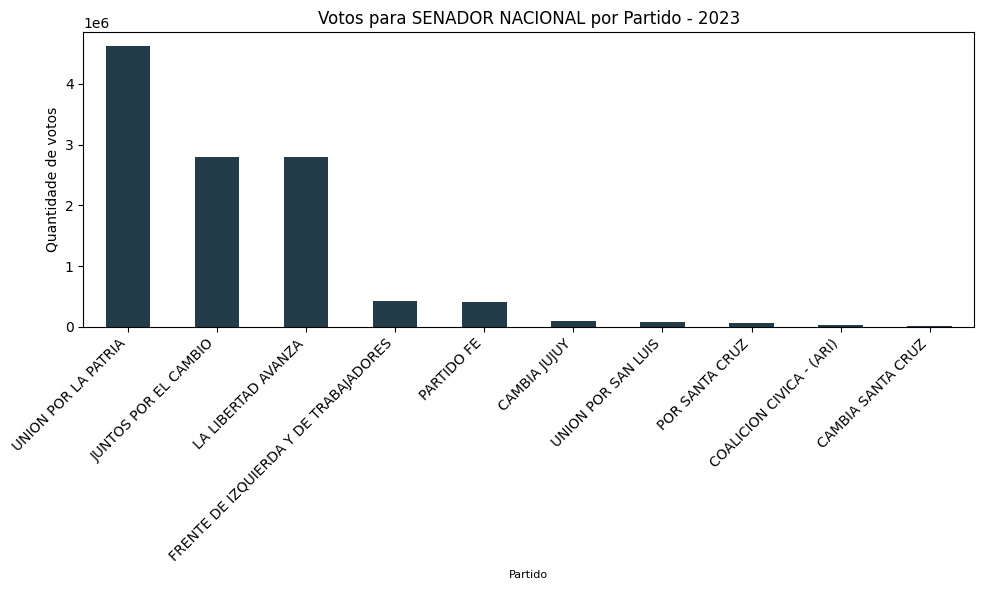

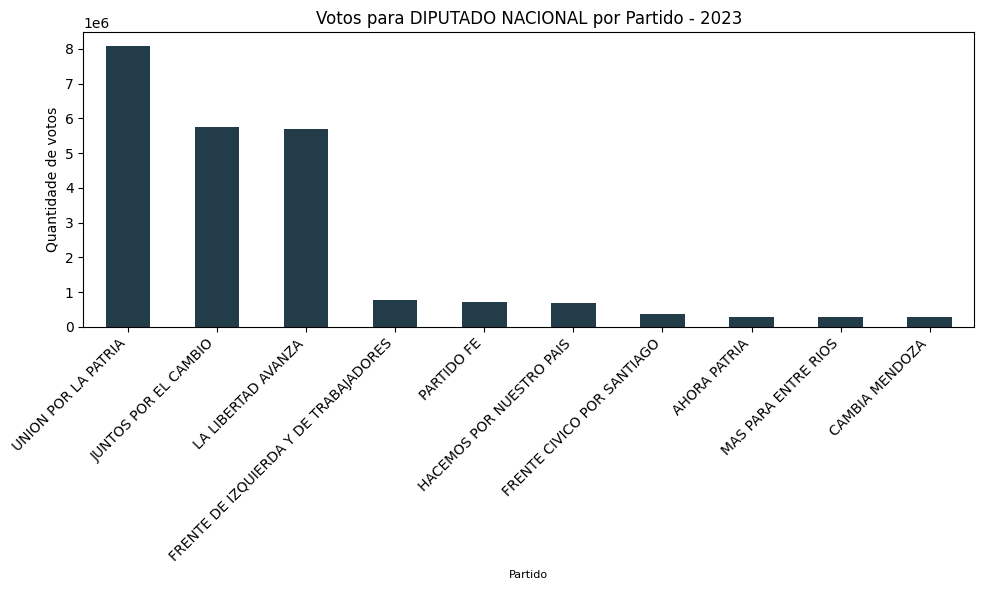

In [6]:
plot_votos(df_2023,"PRESIDENTE Y VICE", 2023)
plot_votos(df_2023,"SENADOR NACIONAL", 2023)
plot_votos(df_2023,"DIPUTADO NACIONAL", 2023)

In [7]:
#Leitura do CSV de 2021 contendo os resultados eleitorais provisorios
df_2021 = read_csv("data\ResultadosElectorales_2021_Generales.csv")
df_2021["agrupacion_nombre"] = df_2021["agrupacion_nombre"].apply(normalize_name)

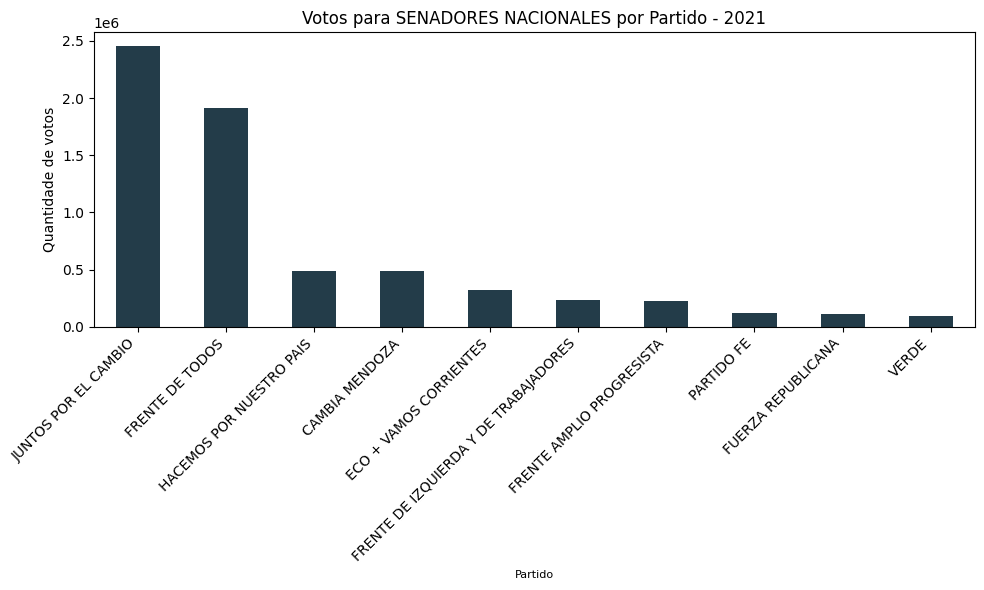

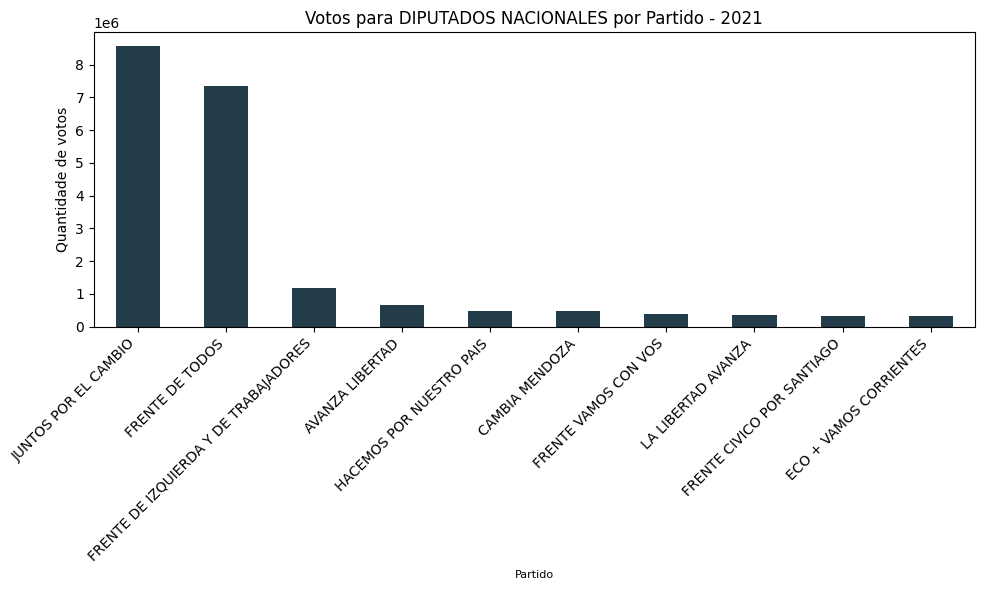

In [8]:
plot_votos(df_2021,"SENADORES NACIONALES", 2021)
plot_votos(df_2021,"DIPUTADOS NACIONALES", 2021)

In [9]:
#Leitura do CSV de 2019 contendo os resultados eleitorais provisorios
df_2019 = read_csv("data\ResultadosElectorales_2019_Generales.csv")
df_2019['agrupacion_nombre'] = df_2019['agrupacion_nombre'].apply(normalize_name)

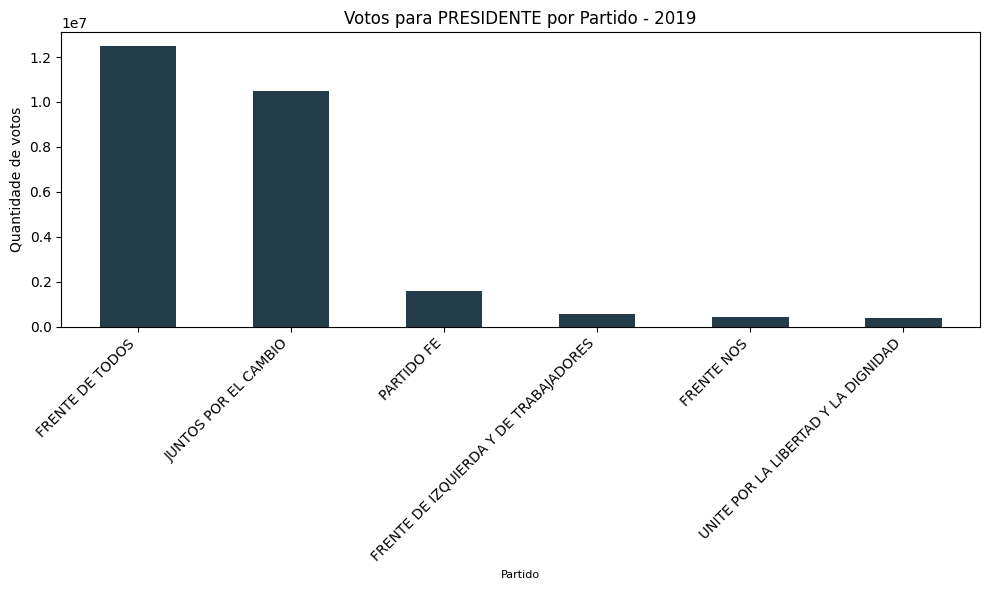

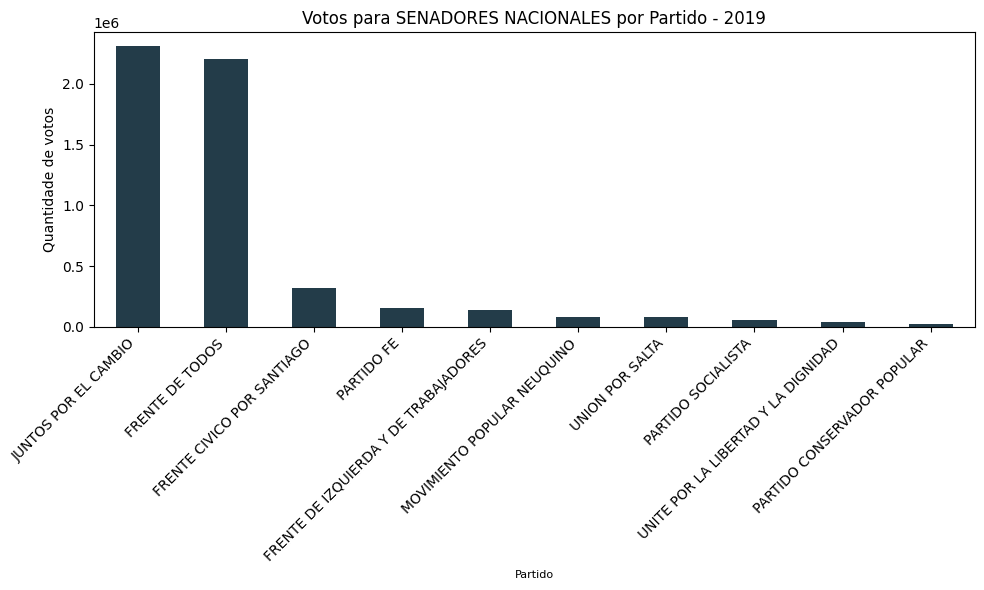

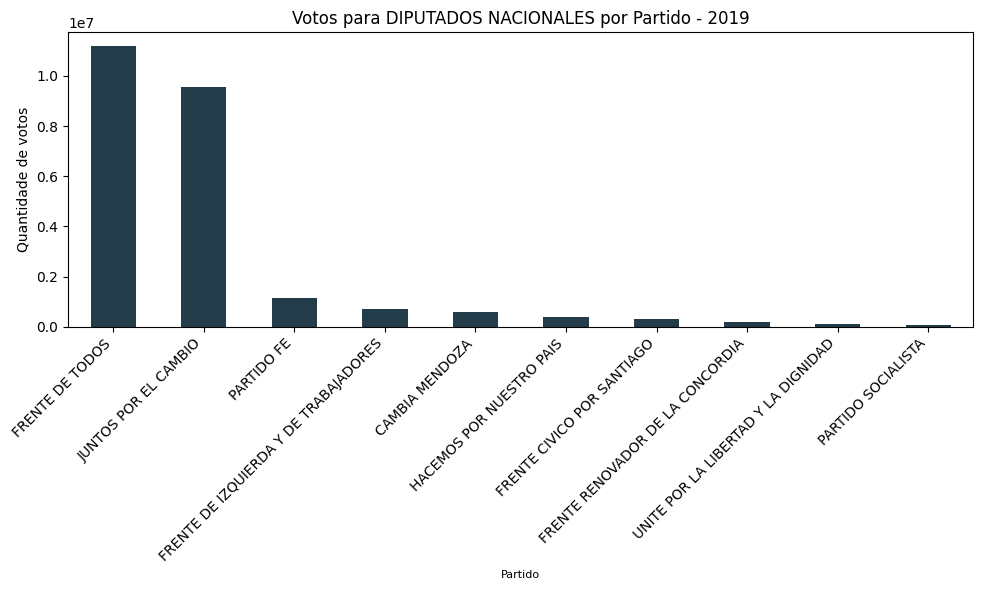

In [10]:
plot_votos(df_2019,"PRESIDENTE", 2019)
plot_votos(df_2019,"SENADORES NACIONALES", 2019)
plot_votos(df_2019,"DIPUTADOS NACIONALES", 2019)

In [11]:
#Leitura do CSV de 2017 contendo os resultados eleitorais provisorios
df_2017 = read_csv("data\ResultadosElectorales2017.csv")
df_2017['agrupacion_nombre'] = df_2017['agrupacion_nombre'].apply(normalize_name)

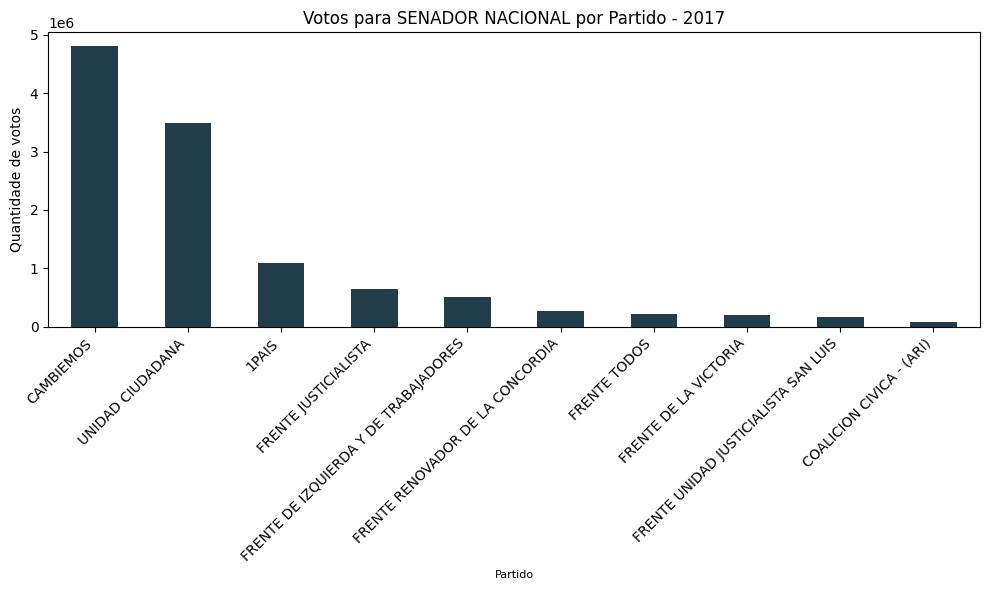

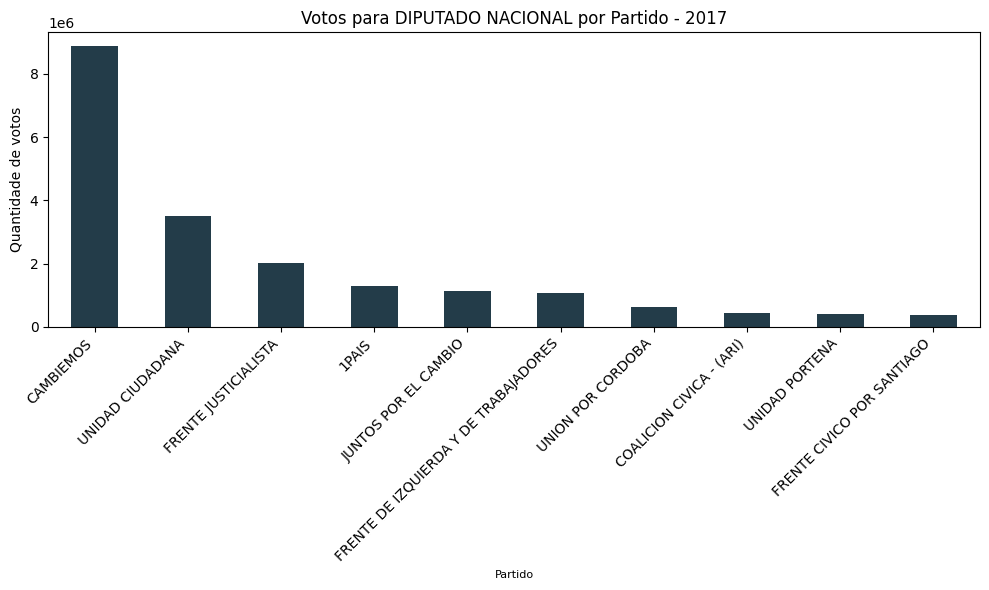

In [12]:
plot_votos(df_2017,"SENADOR NACIONAL", 2017)
plot_votos(df_2017,"DIPUTADO NACIONAL", 2017)

In [13]:
#Leitura do CSV de 2015 contendo os resultados eleitorais provisorios
df_2015 = read_csv("data\ResultadosElectorales2015.csv")
df_2015['agrupacion_nombre'] = df_2015['agrupacion_nombre'].apply(normalize_name)

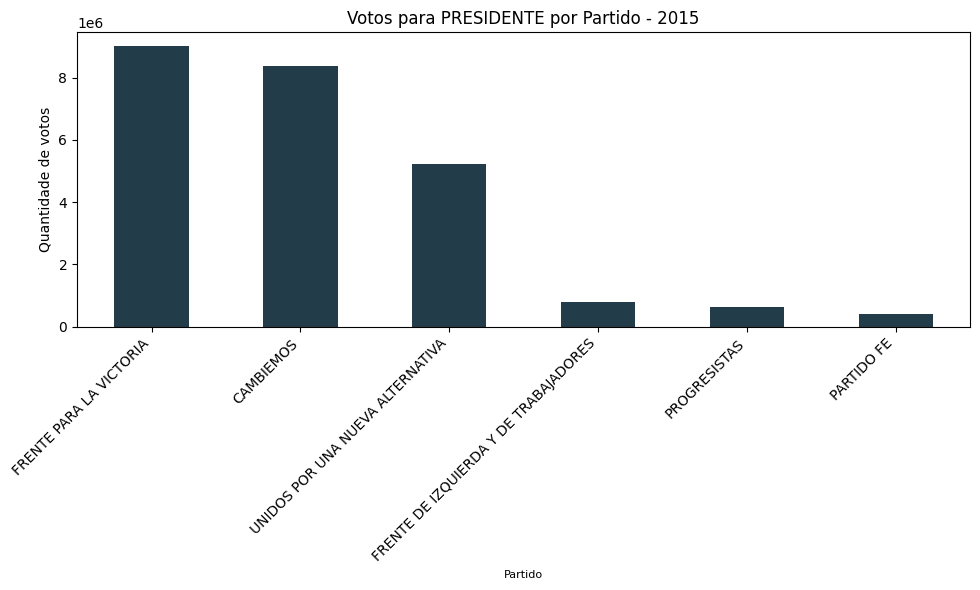

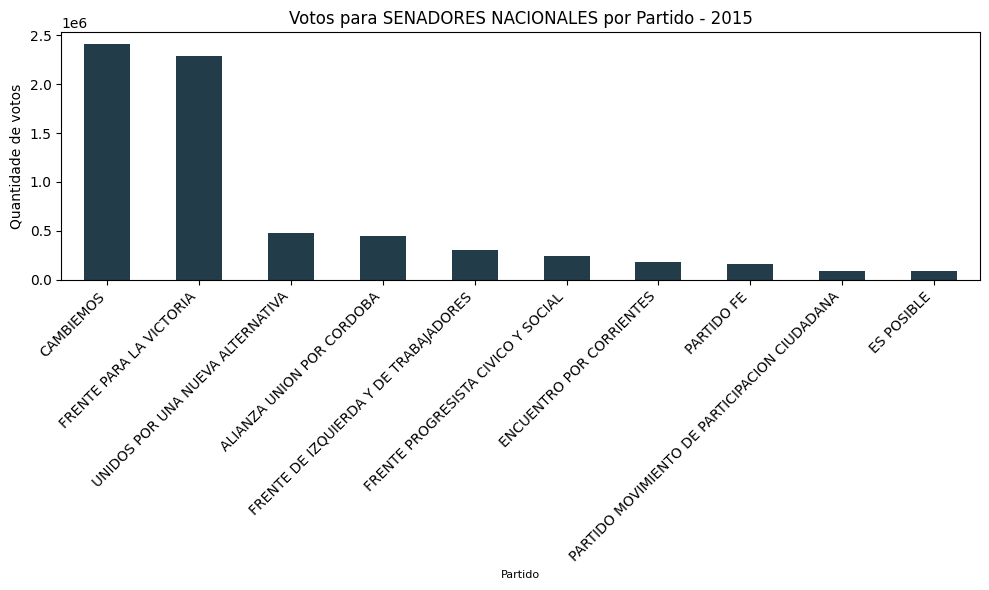

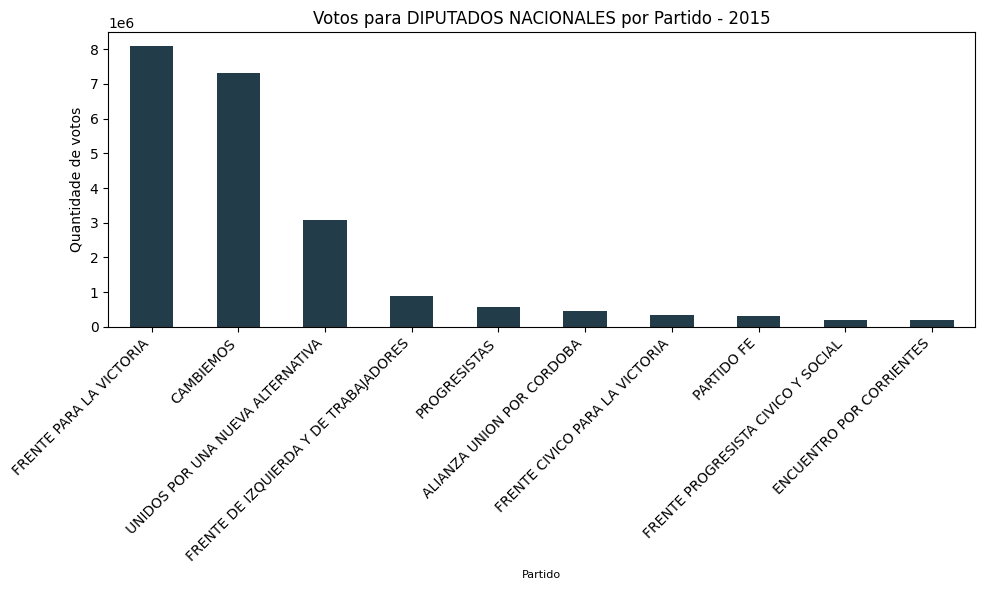

In [14]:
plot_votos(df_2015,"PRESIDENTE", 2015)
plot_votos(df_2015,"SENADORES NACIONALES", 2015)
plot_votos(df_2015,"DIPUTADOS NACIONALES", 2015)

In [15]:
#Leitura do CSV de 2013 contendo os resultados eleitorais provisorios
df_2013 = read_csv("data\ResultadosElectorales2013.csv")
df_2013['agrupacion_nombre'] = df_2013['agrupacion_nombre'].apply(normalize_name)

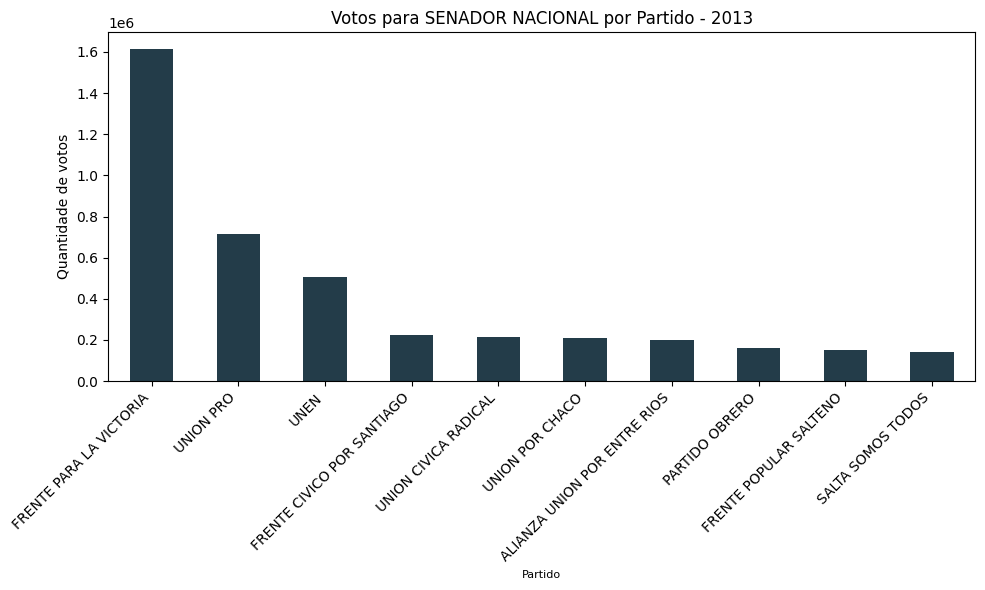

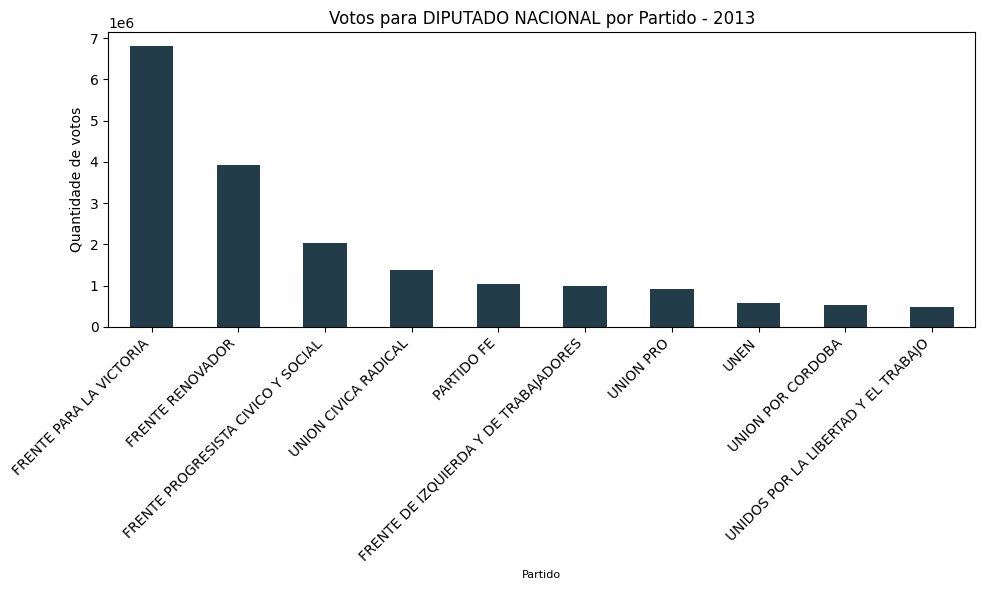

In [16]:
plot_votos(df_2013,"SENADOR NACIONAL", 2013)
plot_votos(df_2013,"DIPUTADO NACIONAL", 2013)

In [17]:
df_ipp = read_csv("data\PartidosNacionaisArgentinaIPP.csv")
df_ipp['Partidos/Coalizacoes Nacionais'] = df_ipp['Partidos/Coalizacoes Nacionais'].apply(normalize_name)

In [18]:
def calcular_ipp_eleicao(df_votos: pd.DataFrame, df_ipp: pd.DataFrame, filtro_cargo: str ,coluna_partido="agrupacion_nombre"):
    # Filtra apenas a eleicao e o cargo desejado
    df_cargo = df_votos[df_votos["cargo_nombre"] == filtro_cargo].copy()

    # Merge para associar o IPP de cada partido
    df_merge = df_cargo.merge(df_ipp, left_on=coluna_partido, right_on="Partidos/Coalizacoes Nacionais", how='left')

    # Renomeia a col IPP
    df_merge.rename(columns={"IPP (Índice de Posição Política)": "IPP"}, inplace=True)

    # Converte para numérico 
    df_merge["IPP"] = pd.to_numeric(df_merge["IPP"], errors="coerce")
    df_merge["votos_cantidad"] = pd.to_numeric(df_merge["votos_cantidad"], errors="coerce")
    
    # Calcula peso IPP * votos
    df_merge["IPP_ponderado"] = df_merge["IPP"] * df_merge["votos_cantidad"]

   # Total de votos válidos com IPP
    total_votos = df_merge["votos_cantidad"].sum()

    # Média ponderada
    ipp_total = df_merge["IPP_ponderado"].sum() / total_votos if total_votos > 0 else None

    return ipp_total, df_merge

In [27]:
anos_dfs_deputados = {
    2023: (df_2023, "DIPUTADO NACIONAL"),
    2021: (df_2021, "DIPUTADOS NACIONALES"),
    2019: (df_2019, "DIPUTADOS NACIONALES"),
    2017: (df_2017, "DIPUTADO NACIONAL"),
    2015: (df_2015, "DIPUTADOS NACIONALES"),
    2013: (df_2013, "DIPUTADO NACIONAL"),
}

anos_dfs_senadores= {
    2023: (df_2023, "SENADOR NACIONAL"),
    2021: (df_2021, "SENADORES NACIONALES"),
    2019: (df_2019, "SENADORES NACIONALES"),
    2017: (df_2017, "SENADOR NACIONAL"),
    2015: (df_2015, "SENADORES NACIONALES"),
    2013: (df_2013, "SENADOR NACIONAL"),
}
def exibir_ipp(dict_dep: dict, dict_sen:dict, df_ipp):
    resultados = {}
    # loop sobre o dicionario de deputados
    for ano, (df, cargo) in dict_dep.items():
        ipp_total_deputados, df_merge = calcular_ipp_eleicao(df, df_ipp, cargo)
        ipp_total_deputados = ipp_total_deputados
        resultados[ano] = (ipp_total_deputados, df_merge)
        print(f"IPP total da eleição para Deputados Nacionais {ano}: {ipp_total_deputados}")

    # loop sobre o dicionario de senadores
    for ano, (df, cargo) in dict_sen.items():
        ipp_total_senadores, df_merge = calcular_ipp_eleicao(df, df_ipp, cargo)
        ipp_total_senadores = ipp_total_senadores
        resultados[ano] = (ipp_total_senadores, df_merge)
        print(f"IPP total da eleição para Senadores Nacionais {ano}: {ipp_total_senadores}")
        

In [28]:
exibir_ipp(anos_dfs_deputados, anos_dfs_senadores, df_ipp=df_ipp)

IPP total da eleição para Deputados Nacionais 2023: 0.44213261434746415
IPP total da eleição para Deputados Nacionais 2021: 0.10507250923294129
IPP total da eleição para Deputados Nacionais 2019: 0.23719657639770164
IPP total da eleição para Deputados Nacionais 2017: -0.0891788553597209
IPP total da eleição para Deputados Nacionais 2015: 0.10090344160185652
IPP total da eleição para Deputados Nacionais 2013: -0.21649793507403914
IPP total da eleição para Senadores Nacionais 2023: 0.4148805030779821
IPP total da eleição para Senadores Nacionais 2021: 0.2188466202678165
IPP total da eleição para Senadores Nacionais 2019: 0.17058902601061932
IPP total da eleição para Senadores Nacionais 2017: -0.3219455383231764
IPP total da eleição para Senadores Nacionais 2015: 0.13951791117080695
IPP total da eleição para Senadores Nacionais 2013: -0.22901316797288757


In [23]:
# Dicionário com os IPPs calculados
ipps_deputados = {
    2023: 0.44213261434746415,
    2021: 0.10507250923294129,
    2019: 0.23719657639770164,
    2017: -0.0891788553597209,
    2015: 0.10090344160185652,
    2013: -0.21649793507403914
}

ipps_senadores = {
    2023: 0.4148805030779821,
    2021: 0.2188466202678165,
    2019: 0.17058902601061932,
    2017: -0.3219455383231764,
    2015: 0.13951791117080695,
    2013: -0.22901316797288757
}

# Criar grafico de barras
anos = [2013, 2015, 2017, 2019, 2021, 2023]
valores_deputados = list(ipps_deputados.get(ano, 0) for ano in anos)
valores_senadores = list(ipps_senadores.get(ano, 0) for ano in anos)

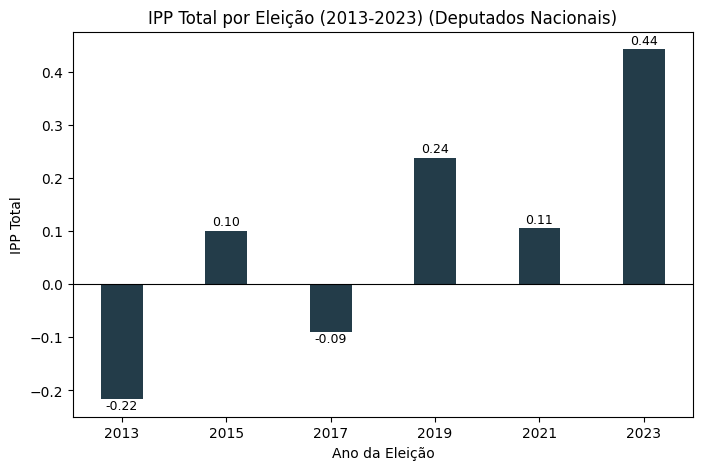

In [24]:
plt.figure(figsize=(8, 5))
plt.bar(anos, valores_deputados, color="#233C49")

plt.xlabel("Ano da Eleição")
plt.ylabel("IPP Total")
plt.title("IPP Total por Eleição (2013-2023) (Deputados Nacionais)")
plt.axhline(0, color="black", linewidth=0.8)

plt.xticks(anos)

# Mostrar valores acima das barras
for i, v in enumerate(valores_deputados):
    if anos[i] in ipps_deputados:
        plt.text(anos[i], v + 0.01 if v >= 0 else v - 0.02, f"{v:.2f}", 
                ha="center", fontsize=9)

plt.show()

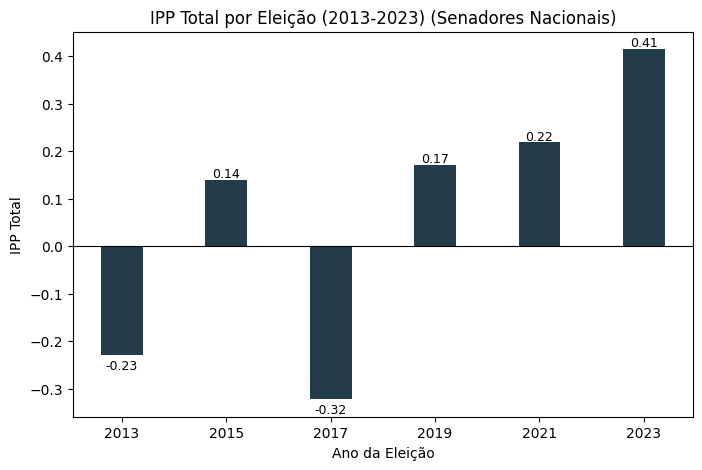

In [25]:
plt.figure(figsize=(8, 5))
plt.bar(anos, valores_senadores, color="#233C49")

plt.xlabel("Ano da Eleição")
plt.ylabel("IPP Total")
plt.title("IPP Total por Eleição (2013-2023) (Senadores Nacionais)")
plt.axhline(0, color="black", linewidth=0.8)

plt.xticks(anos)

# Mostrar valores acima das barras
for i, v in enumerate(valores_senadores):
    if anos[i] in ipps_senadores:
        plt.text(anos[i], v + 0.005 if v >= 0 else v - 0.03, f"{v:.2f}", 
                ha="center", fontsize=9)

plt.show()

Agora vamos analisar apenas para as coalizões, excluindo os partidos nacionais que foram mapeados.

In [29]:
df_ipp_coalizoes = read_csv("data\CoalizoesArgentinaIPP.csv")
df_ipp_coalizoes['Partidos/Coalizacoes Nacionais'] = df_ipp_coalizoes['Partidos/Coalizacoes Nacionais'].apply(normalize_name)

In [30]:
exibir_ipp(anos_dfs_deputados, anos_dfs_senadores, df_ipp=df_ipp_coalizoes)

IPP total da eleição para Deputados Nacionais 2023: 0.3409887775023321
IPP total da eleição para Deputados Nacionais 2021: 0.017581772569184147
IPP total da eleição para Deputados Nacionais 2019: 0.027538367309280904
IPP total da eleição para Deputados Nacionais 2017: -0.15706048469360365
IPP total da eleição para Deputados Nacionais 2015: 0.02555036817967935
IPP total da eleição para Deputados Nacionais 2013: -0.4024880603535909
IPP total da eleição para Senadores Nacionais 2023: 0.29042181602984807
IPP total da eleição para Senadores Nacionais 2021: 0.13094304019153377
IPP total da eleição para Senadores Nacionais 2019: 0.032708826298206886
IPP total da eleição para Senadores Nacionais 2017: -0.3479593088588069
IPP total da eleição para Senadores Nacionais 2015: 0.019570628696715223
IPP total da eleição para Senadores Nacionais 2013: -0.22151422744243668


In [32]:
# Dicionário com os IPPs calculados
ipps_deputados_coalizoes = {
    2023: 0.3409887775023321,
    2021: 0.017581772569184147,
    2019: 0.027538367309280904,
    2017: -0.15706048469360365,
    2015: 0.02555036817967935,
    2013: -0.4024880603535909
}

ipps_senadores_coalizoes = {
    2023: 0.29042181602984807,
    2021: 0.13094304019153377,
    2019: 0.032708826298206886,
    2017: -0.3479593088588069,
    2015: 0.019570628696715223,
    2013: -0.22151422744243668
}

# Criar grafico de barras
anos = [2013, 2015, 2017, 2019, 2021, 2023]
valores_deputados_coalizoes = list(ipps_deputados_coalizoes.get(ano, 0) for ano in anos)
valores_senadores_coalizoes = list(ipps_senadores_coalizoes.get(ano, 0) for ano in anos)

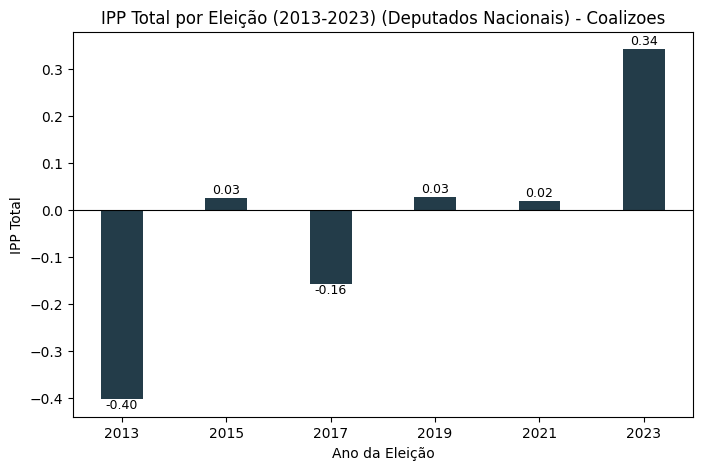

In [33]:
plt.figure(figsize=(8, 5))
plt.bar(anos, valores_deputados_coalizoes, color="#233C49")

plt.xlabel("Ano da Eleição")
plt.ylabel("IPP Total")
plt.title("IPP Total por Eleição (2013-2023) (Deputados Nacionais) - Coalizoes")
plt.axhline(0, color="black", linewidth=0.8)

plt.xticks(anos)

# Mostrar valores acima das barras
for i, v in enumerate(valores_deputados_coalizoes):
    if anos[i] in ipps_deputados:
        plt.text(anos[i], v + 0.01 if v >= 0 else v - 0.02, f"{v:.2f}", 
                ha="center", fontsize=9)

plt.show()

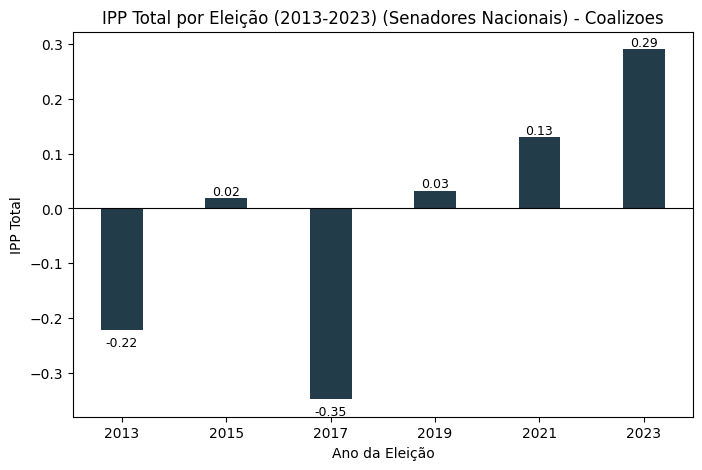

In [34]:
plt.figure(figsize=(8, 5))
plt.bar(anos, valores_senadores_coalizoes, color="#233C49")

plt.xlabel("Ano da Eleição")
plt.ylabel("IPP Total")
plt.title("IPP Total por Eleição (2013-2023) (Senadores Nacionais) - Coalizoes")
plt.axhline(0, color="black", linewidth=0.8)

plt.xticks(anos)

# Mostrar valores acima das barras
for i, v in enumerate(valores_senadores_coalizoes):
    if anos[i] in ipps_senadores:
        plt.text(anos[i], v + 0.005 if v >= 0 else v - 0.03, f"{v:.2f}", 
                ha="center", fontsize=9)

plt.show()